## Joints
- Ini merupakan perlombaan yang saya pernah ikuti satu tahun yang lalu di UGM
- Nama tim saya saat itu adalah AB
- Berikut link nya : https://www.kaggle.com/c/joints-dm-2019/
- Kolom yang dicari pada data testing adalah gender

### Keterangan:
Bila saat running ada kendala error seperti "KeyError: 'gender'
", lanjutkan saja.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test_data.csv")
sampleData = pd.read_csv("sample_submission.csv")

In [9]:
train.head()

,id,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,poi_1,poi_2,poi_3,size,price_monthly,room_count,total_call,gender
0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1778.0,10038.0,4106.0,9.00,1500000.0,6.0,72,2
1,2,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,4548.0,9332.0,6867.0,12.00,1500000.0,30.0,56,2
2,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,5174.0,9021.0,3693.0,12.00,1600000.0,20.0,109,2
3,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1490.0,8954.0,2139.0,8.25,1500000.0,15.0,54,2
4,5,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1688.0,8851.0,2145.0,14.85,2100000.0,10.0,19,2


In [3]:
ttrain = [train,test]

In [4]:
#sub 1
train["poi_1"] = train["poi_1"].fillna(train.groupby("gender")["poi_1"].transform("median"))
train["poi_2"] = train["poi_2"].fillna(train.groupby("gender")["poi_2"].transform("median"))
train["poi_3"] = train["poi_3"].fillna(train.groupby("gender")["poi_3"].transform("median"))
train["size"] = train["size"].fillna(train.groupby("gender")["size"].transform("median"))
train["price_monthly"] = train["price_monthly"].fillna(train.groupby("gender")["price_monthly"].transform("median"))
train["room_count"] = train["room_count"].fillna(train.groupby("gender")["room_count"].transform("median"))
train["total_call"] = train["total_call"].fillna(train.groupby("gender")["total_call"].transform("median"))

In [5]:
#sub 1
train["fac_1"] = train["fac_1"].fillna(train["fac_1"].mode()[0])
train["fac_2"] = train["fac_2"].fillna(train["fac_2"].mode()[0])
train["fac_3"] = train["fac_3"].fillna(train["fac_3"].mode()[0])
train["fac_4"] = train["fac_4"].fillna(train["fac_4"].mode()[0])
train["fac_5"] = train["fac_5"].fillna(train["fac_5"].mode()[0])
train["fac_6"] = train["fac_6"].fillna(train["fac_6"].mode()[0])
train["fac_7"] = train["fac_7"].fillna(train["fac_7"].mode()[0])
train["fac_8"] = train["fac_8"].fillna(train["fac_8"].mode()[0])

In [8]:
gender_mapping = {"putra":0, "putri":1, "campur":2}
for dataset in ttrain:
    dataset["gender"] = dataset["gender"].map(gender_mapping)

KeyError: 'gender'

In [10]:
################################

In [11]:
#sub 2
train2 = pd.read_csv("C:/Users/windows/Downloads/AB/joints/train.csv")
train2 = train.dropna(axis="rows")
bigtrain = pd.concat([train, train2], ignore_index=True )

In [12]:
bigtrain.shape

(6586, 17)

In [13]:
fac_total = train["fac_1"]+train["fac_2"]+train["fac_3"]+train["fac_4"]+ \
train["fac_5"]+train["fac_6"]+train["fac_7"]+train["fac_8"]

#train["fac_total"] = fac_total

In [14]:
for dataset in ttrain:
    dataset.loc[(dataset["fac_total"] > 2) & (dataset["fac_total"] <= 4), "fac_total"] = 1,
    dataset.loc[(dataset["fac_total"] > 4) & (dataset["fac_total"] <= 6), "fac_total"] = 2,

KeyError: 'fac_total'

In [15]:
####################

In [16]:
train.describe()

,id,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,poi_1,poi_2,poi_3,size,price_monthly,room_count,total_call,gender
count,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3.293000e+03,3293.000000,3293.000000,3293.000000
mean,1647.000000,0.256605,0.617067,0.447920,0.571819,0.649256,0.419374,0.004555,0.528394,4665.080474,9907.750076,4881.133009,12.108069,8.936500e+05,10.447312,35.362587,0.895536
std,950.751545,0.436826,0.486176,0.497356,0.494890,0.477275,0.493532,0.067348,0.499269,3534.056985,4667.454136,3573.419628,4.908198,6.433234e+05,9.471838,47.269615,0.681304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,519.000000,168.000000,324.000000,6.000000,1.550000e+05,1.000000,1.000000,0.000000
25%,824.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2401.000000,7918.000000,2727.000000,9.000000,5.000000e+05,4.000000,8.000000,0.000000
50%,1647.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3963.000000,9266.000000,3927.000000,12.000000,6.500000e+05,8.000000,20.000000,1.000000
75%,2470.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5850.000000,12354.000000,5957.000000,12.000000,1.200000e+06,14.000000,44.000000,1.000000
max,3293.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48675.000000,55105.000000,46517.000000,48.000000,5.000000e+06,121.000000,769.000000,2.000000


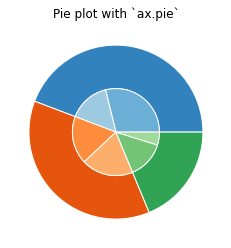

In [17]:
fig, ax = plt.subplots()

size = 0.5
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

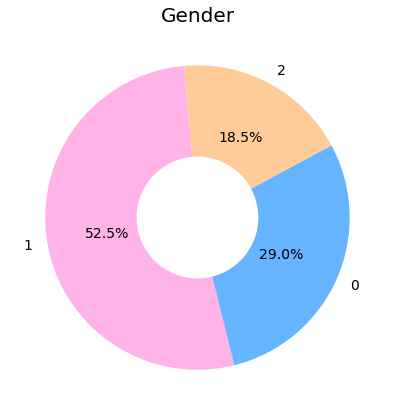

In [18]:
#Untuk pelabelan gender
default_colors = ['#ffb3e6', '#66b3ff', '#ffcc99']
ax = train["gender"].value_counts().plot.pie(autopct='%1.1f%%', colors=default_colors, startangle=95, title="Gender",
                                            fontsize=14)

fig = plt.gcf()
fig.set_size_inches(8, 7)

ax.set_ylabel('')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
        
centre_circle = plt.Circle((0,0), 0.40, fc='white')
fig.gca().add_artist(centre_circle)

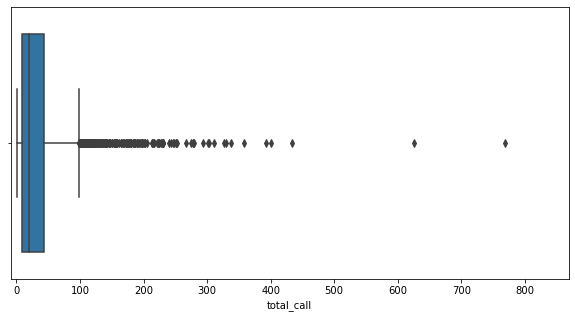

In [19]:
#Untuk pelabelan total_call
plt.figure(figsize=(10,5))
plt.xlim(train.total_call.min()-10, train.total_call.max()+100)
sns.boxplot(x=train.total_call)
plt.show()

In [20]:
for dataset in ttrain:
    dataset.loc[dataset["total_call"] <= 20, "total_call"] = 0,
    dataset.loc[(dataset["total_call"] > 20) & (dataset["total_call"] <= 40), "total_call"] = 0.2,
    dataset.loc[(dataset["total_call"] > 40) & (dataset["total_call"] <= 60), "total_call"] = 0.4,
    dataset.loc[(dataset["total_call"] > 60) & (dataset["total_call"] <= 80), "total_call"] = 0.6,
    dataset.loc[(dataset["total_call"] > 80) & (dataset["total_call"] <= 100), "total_call"] = 0.8,
    dataset.loc[(dataset["total_call"] > 100) & (dataset["total_call"] <= 130), "total_call"] = 1,
    dataset.loc[(dataset["total_call"] > 130) & (dataset["total_call"] <= 160), "total_call"] = 1.2,
    dataset.loc[(dataset["total_call"] > 160) & (dataset["total_call"] <= 190), "total_call"] = 1.4,
    dataset.loc[(dataset["total_call"] > 190) & (dataset["total_call"] <= 220), "total_call"] = 1.6,
    dataset.loc[(dataset["total_call"] > 220) & (dataset["total_call"] <= 250), "total_call"] = 1.8,
    dataset.loc[(dataset["total_call"] > 250) & (dataset["total_call"] <= 290), "total_call"] = 2,
    dataset.loc[(dataset["total_call"] > 290) & (dataset["total_call"] <= 340), "total_call"] = 2.2,
    dataset.loc[(dataset["total_call"] > 340) & (dataset["total_call"] <= 400), "total_call"] = 2.4,
    dataset.loc[dataset["total_call"] > 400, "total_call"] = 2.6

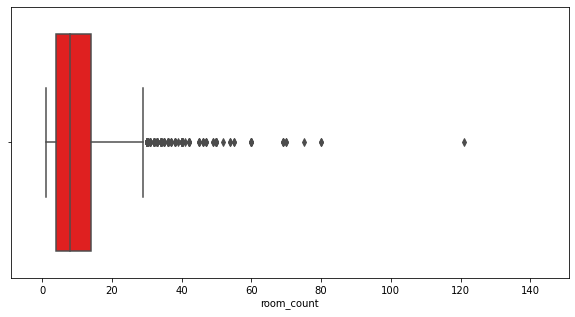

In [21]:
#Untuk pelabelan room_count
plt.figure(figsize=(10,5))
plt.xlim(train.room_count.min()-10, train.room_count.max()+30)
sns.boxplot(x=train.room_count, color="red")
sns.set
plt.show()

In [22]:
for dataset in ttrain:
    dataset.loc[dataset["room_count"] <= 7, "room_count"] = 0,
    dataset.loc[(dataset["room_count"] > 7) & (dataset["room_count"] <= 14), "room_count"] = 0.2,
    dataset.loc[(dataset["room_count"] > 14) & (dataset["room_count"] <= 21), "room_count"] = 0.4,
    dataset.loc[(dataset["room_count"] > 21) & (dataset["room_count"] <= 28), "room_count"] = 0.6,
    dataset.loc[(dataset["room_count"] > 28) & (dataset["room_count"] <= 35), "room_count"] = 0.8,
    dataset.loc[(dataset["room_count"] > 35) & (dataset["room_count"] <= 42), "room_count"] = 1,
    dataset.loc[(dataset["room_count"] > 42) & (dataset["room_count"] <= 49), "room_count"] = 1.2,
    dataset.loc[(dataset["room_count"] > 49) & (dataset["room_count"] <= 56), "room_count"] = 1.4,
    dataset.loc[(dataset["room_count"] > 56) & (dataset["room_count"] <= 63), "room_count"] = 1.6,
    dataset.loc[(dataset["room_count"] > 63) & (dataset["room_count"] <= 70), "room_count"] = 1.8,
    dataset.loc[dataset["room_count"] > 70, "room_count"] = 2

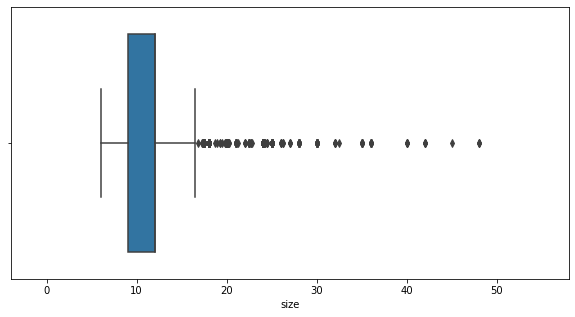

In [23]:
#Untuk pelabelan size
plt.figure(figsize=(10,5))
plt.xlim(train["size"].min()-10, train["size"].max()+10)
sns.boxplot(x=train["size"])
plt.show()

In [24]:
for dataset in ttrain:
    dataset.loc[dataset["size"] <= 10, "size"] = 0,
    dataset.loc[(dataset["size"] > 10) & (dataset["size"] <= 13), "size"] = 0.2,
    dataset.loc[(dataset["size"] > 13) & (dataset["size"] <= 16), "size"] = 0.4,
    dataset.loc[(dataset["size"] > 16) & (dataset["size"] <= 19), "size"] = 0.6,
    dataset.loc[(dataset["size"] > 19) & (dataset["size"] <= 21), "size"] = 0.8,
    dataset.loc[(dataset["size"] > 21) & (dataset["size"] <= 25), "size"] = 1,
    dataset.loc[(dataset["size"] > 25) & (dataset["size"] <= 30), "size"] = 1.2,
    dataset.loc[(dataset["size"] > 30) & (dataset["size"] <= 35), "size"] = 1.4,
    dataset.loc[(dataset["size"] > 35) & (dataset["size"] <= 40), "size"] = 1.6,
    dataset.loc[dataset["size"] > 40, "size"] = 1.8

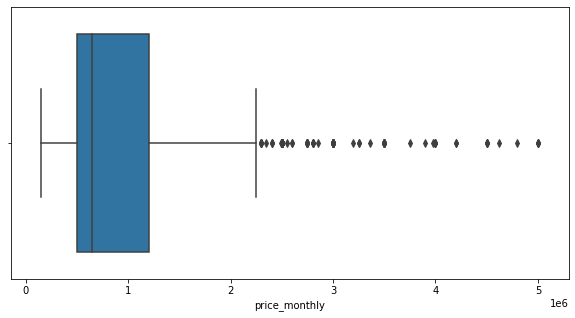

In [25]:
#Untuk pelabelan price_monthly
plt.figure(figsize=(10,5))
plt.xlim(train.price_monthly.min()-300000, train.price_monthly.max()+300000)
sns.boxplot(x=train.price_monthly)
plt.show()

In [26]:
for dataset in ttrain:
    dataset.loc[dataset["price_monthly"] <= 400000, "price_monthly"] = 0,
    dataset.loc[(dataset["price_monthly"] > 400000) & (dataset["price_monthly"] <= 800000), "price_monthly"] = 0.2,
    dataset.loc[(dataset["price_monthly"] > 800000) & (dataset["price_monthly"] <= 1200000), "price_monthly"] = 0.4,
    dataset.loc[(dataset["price_monthly"] > 1200000) & (dataset["price_monthly"] <= 1600000), "price_monthly"] = 0.6,
    dataset.loc[(dataset["price_monthly"] > 1600000) & (dataset["price_monthly"] <= 2000000), "price_monthly"] = 0.8,
    dataset.loc[(dataset["price_monthly"] > 2000000) & (dataset["price_monthly"] <= 2400000), "price_monthly"] = 1,
    dataset.loc[(dataset["price_monthly"] > 2400000) & (dataset["price_monthly"] <= 3000000), "price_monthly"] = 1.2,
    dataset.loc[(dataset["price_monthly"] > 3000000) & (dataset["price_monthly"] <= 3500000), "price_monthly"] = 1.4,
    dataset.loc[(dataset["price_monthly"] > 3500000) & (dataset["price_monthly"] <= 4000000), "price_monthly"] = 1.6,
    dataset.loc[dataset["price_monthly"] > 4000000, "price_monthly"] = 1.8

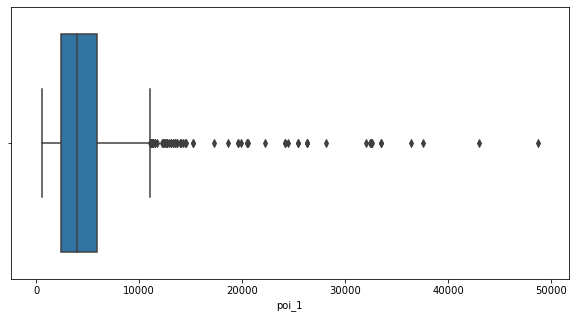

In [27]:
#Untuk pelabelan poi_1
plt.figure(figsize=(10,5))
plt.xlim(train.poi_1.min()-3000, train.poi_1.max()+3000)
sns.boxplot(x=train.poi_1)
plt.show()

In [28]:
for dataset in ttrain:
    dataset.loc[dataset["poi_1"] <= 4000, "poi_1"] = 0,
    dataset.loc[(dataset["poi_1"] > 4000) & (dataset["poi_1"] <= 8000), "poi_1"] = 0.2,
    dataset.loc[(dataset["poi_1"] > 8000) & (dataset["poi_1"] <= 12000), "poi_1"] = 0.4,
    dataset.loc[(dataset["poi_1"] > 12000) & (dataset["poi_1"] <= 16000), "poi_1"] = 0.6,
    dataset.loc[(dataset["poi_1"] > 16000) & (dataset["poi_1"] <= 20000), "poi_1"] = 0.8,
    dataset.loc[(dataset["poi_1"] > 20000) & (dataset["poi_1"] <= 24000), "poi_1"] = 1,
    dataset.loc[(dataset["poi_1"] > 24000) & (dataset["poi_1"] <= 28000), "poi_1"] = 1.2,
    dataset.loc[(dataset["poi_1"] > 28000) & (dataset["poi_1"] <= 32000), "poi_1"] = 1.4,
    dataset.loc[(dataset["poi_1"] > 32000) & (dataset["poi_1"] <= 40000), "poi_1"] = 1.6,
    dataset.loc[dataset["poi_1"] > 40000, "poi_1"] = 1.8

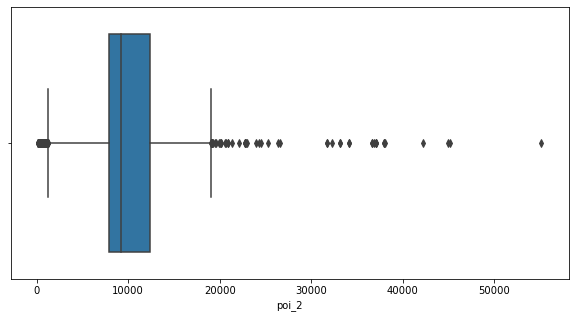

In [29]:
#Untuk pelabelan poi_2
plt.figure(figsize=(10,5))
plt.xlim(train.poi_2.min()-3000, train.poi_2.max()+3000)
sns.boxplot(x=train.poi_2)
plt.show()

In [30]:
for dataset in ttrain:
    dataset.loc[dataset["poi_2"] <= 4000, "poi_2"] = 0,
    dataset.loc[(dataset["poi_2"] > 4000) & (dataset["poi_2"] <= 8000), "poi_2"] = 0.2,
    dataset.loc[(dataset["poi_2"] > 8000) & (dataset["poi_2"] <= 12000), "poi_2"] = 0.4,
    dataset.loc[(dataset["poi_2"] > 12000) & (dataset["poi_2"] <= 16000), "poi_2"] = 0.6,
    dataset.loc[(dataset["poi_2"] > 16000) & (dataset["poi_2"] <= 20000), "poi_2"] = 0.8,
    dataset.loc[(dataset["poi_2"] > 20000) & (dataset["poi_2"] <= 24000), "poi_2"] = 1,
    dataset.loc[(dataset["poi_2"] > 24000) & (dataset["poi_2"] <= 28000), "poi_2"] = 1.2,
    dataset.loc[(dataset["poi_2"] > 28000) & (dataset["poi_2"] <= 32000), "poi_2"] = 1.4,
    dataset.loc[(dataset["poi_2"] > 32000) & (dataset["poi_2"] <= 40000), "poi_2"] = 1.6,
    dataset.loc[dataset["poi_2"] > 40000, "poi_2"] = 1.8

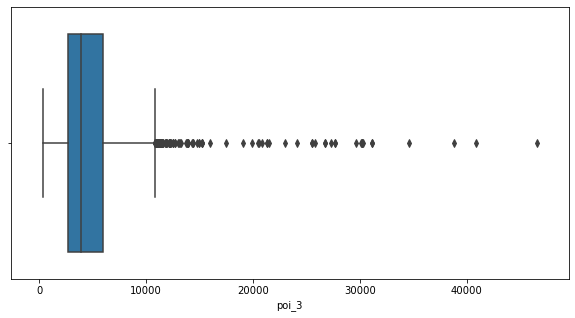

In [31]:
#Untuk pelabelan poi_3
plt.figure(figsize=(10,5))
plt.xlim(train.poi_3.min()-3000, train.poi_3.max()+3000)
sns.boxplot(x=train.poi_3)
plt.show()

In [32]:
for dataset in ttrain:
    dataset.loc[dataset["poi_3"] <= 4000, "poi_3"] = 0,
    dataset.loc[(dataset["poi_3"] > 4000) & (dataset["poi_3"] <= 8000), "poi_3"] = 0.2,
    dataset.loc[(dataset["poi_3"] > 8000) & (dataset["poi_3"] <= 12000), "poi_3"] = 0.4,
    dataset.loc[(dataset["poi_3"] > 12000) & (dataset["poi_3"] <= 16000), "poi_3"] = 0.6,
    dataset.loc[(dataset["poi_3"] > 16000) & (dataset["poi_3"] <= 20000), "poi_3"] = 0.8,
    dataset.loc[(dataset["poi_3"] > 20000) & (dataset["poi_3"] <= 24000), "poi_3"] = 1,
    dataset.loc[(dataset["poi_3"] > 24000) & (dataset["poi_3"] <= 28000), "poi_3"] = 1.2,
    dataset.loc[(dataset["poi_3"] > 28000) & (dataset["poi_3"] <= 32000), "poi_3"] = 1.4,
    dataset.loc[(dataset["poi_3"] > 32000) & (dataset["poi_3"] <= 40000), "poi_3"] = 1.6,
    dataset.loc[dataset["poi_3"] > 40000, "poi_3"] = 1.8

In [33]:
##################################

In [34]:
train.head()

,id,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,poi_1,poi_2,poi_3,size,price_monthly,room_count,total_call,gender
0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.4,0.2,0.0,0.6,0.0,0.6,2
1,2,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.2,0.4,0.2,0.2,0.6,0.8,0.4,2
2,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.2,0.4,0.0,0.2,0.6,0.4,1.0,2
3,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.4,0.0,0.0,0.6,0.4,0.4,2
4,5,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.4,0.0,0.4,1.0,0.2,0.0,2


In [35]:
train.loc[train.poi_1 > 40000, 'poi_1'] = train["poi_1"].quantile(0.75)
train.loc[train.poi_2 > 40000, 'poi_2'] = train["poi_2"].quantile(0.75)
train.loc[train.poi_3 > 40000, 'poi_3'] = train["poi_3"].quantile(0.75)
#train.loc[train.size > 35, 'size'] = train["size"].quantile(0.75)
train.loc[train.price_monthly > 4300000, 'price_monthly'] = train["price_monthly"].quantile(0.75)
train.loc[train.room_count > 80, 'room_count'] = train["room_count"].quantile(0.75)
train.loc[train.total_call > 400, 'total_call'] = train["total_call"].quantile(0.75)

In [36]:
train.columns.unique()

Index(['id', 'fac_1', 'fac_2', 'fac_3', 'fac_4', 'fac_5', 'fac_6', 'fac_7',
       'fac_8', 'poi_1', 'poi_2', 'poi_3', 'size', 'price_monthly',
       'room_count', 'total_call', 'gender'],
      dtype='object')

In [37]:
##################################

In [38]:
k_fold = KFold(n_splits=20, shuffle=True, random_state=7)

In [39]:
X = bigtrain.drop(["id", "gender"], axis=1)
y = bigtrain.filter(["gender"], axis=1)

In [42]:
tester = test.drop("id", axis=1)

In [43]:
clf = RandomForestClassifier(n_estimators=200)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc = StandardScaler()
X = sc.fit_transform(X)
tester= sc.transform(tester)

scoring = "accuracy"
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1,
                       scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.97575758 0.99393939 0.98787879 0.97575758 0.99393939 0.98181818
 0.98176292 0.98176292 0.97568389 0.99392097 0.98176292 0.99392097
 0.95744681 0.96960486 0.97568389 0.96960486 0.99392097 0.98176292
 0.98784195 0.98176292]


98.18

In [44]:
test.head()

,id,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,poi_1,poi_2,poi_3,size,price_monthly,room_count,total_call
0,3294,0,1,0,0,0,0,0,1,0.0,0.4,0.0,0.8,0.2,0.0,0.0
1,3295,1,1,1,1,1,1,0,1,0.2,0.0,0.2,0.2,0.4,0.4,0.2
2,3296,0,1,1,1,1,0,0,1,0.4,0.0,0.4,0.2,0.2,0.2,0.0
3,3297,0,1,1,1,1,0,0,1,0.4,0.0,0.4,0.2,0.2,0.4,0.0
4,3298,0,1,0,0,1,0,0,1,0.0,0.4,0.0,0.4,0.2,0.0,0.2


In [45]:
clf.fit(X, y)
prediction = clf.predict(tester)

In [46]:
submission = pd.DataFrame({
    "id":test["id"],
    "gender":prediction
})

In [47]:
ttest = [submission]
gender_mapping = {0:"putra", 1:"putri", 2:"campur"}
for dataset in ttest:
    dataset["gender"] = dataset["gender"].map(gender_mapping)

In [48]:
submission.to_csv("DataMining_Prediksi_AB.csv", index=False)

In [49]:
hasil = pd.read_csv("DataMining_prediksi_AB.csv")
hasil.head(20)

,id,gender
0,3294,putri
1,3295,putri
2,3296,putri
3,3297,putri
4,3298,putri
5,3299,putri
6,3300,campur
7,3301,putri
8,3302,putri
9,3303,putri
